#PERCEPTRON CIFAR10


In [1]:
%matplotlib inline

import torch
import torchvision
import numpy as np

np.seterr(all='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

0it [00:00, ?it/s]

100%|█████████▉| 169730048/170498071 [00:45<00:00, 5774236.86it/s]

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [0]:

# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

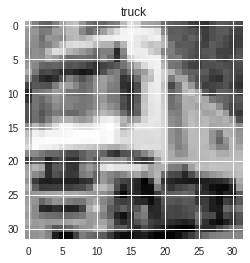

In [6]:
# Mostrar uma imagem

import matplotlib.pyplot as plt
import numpy as np

image_index = 1
label = grayscale_dataset_train[image_index][1]
npimg = grayscale_dataset_train[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()

In [0]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))    

In [8]:
size = len(linear_dataset_train[0][0])
print(size)

1024


# Perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
  
def stepFunction(t):
  if t >= 0.5:
    return 1
  else:
    return 0

def perceptron(inputs, weights):
  value = inputs.dot(weights)
  return value
  pass

In [0]:
def sigmoid_derivate(value):
  y = sigmoid(value)
  return y*(1-y)

In [0]:
def evaluate(weights,dataset):
  error = 0
   # Defina a métrica de avaliação do perceptron aqui (e.g. acurácia)
  for img,label in dataset:
    inputs = np.append(img,[1])
    pred = perceptron(inputs,weights)
    if(stepFunction(pred)!=label):
      error+=1
  ev = (len(dataset)-error) /len(dataset)
  return ev

  pass

In [44]:
# Inicialização
weights = (np.random.rand(1,size) - 0.5)[0]
bias = (np.random.rand(1) - 0.5) 
weights = np.append(weights, bias) 
bestEvaluation = 0
neta = 0.001

  # Implemente o treino aqui (para separar as duas classes definidas)
accuracies = []
for epoch in range(100):
  np.random.shuffle(linear_dataset_train)
  for img,label in linear_dataset_train:
    inputs = np.append(img,[1])
    pred = perceptron(inputs,weights)
    error = label - sigmoid(pred) 
    loss = inputs*error*neta*(sigmoid_derivate(pred))
    weights += loss
  acc = evaluate(weights,linear_dataset_train) 
  accuracies.append(acc)
  
  print(epoch," ",acc)  
  
print("DONE")

    
        
    #pass

0   0.69124
1   0.69976
2   0.7015
3   0.70792
4   0.71092
5   0.7107
6   0.71214
7   0.71284
8   0.70756
9   0.71146
10   0.71742
11   0.70464
12   0.71558
13   0.72032
14   0.71962
15   0.72092
16   0.71878
17   0.72062
18   0.7244
19   0.71988
20   0.7244
21   0.72222
22   0.71
23   0.72616
24   0.71414
25   0.71752
26   0.72584
27   0.71748
28   0.727
29   0.724
30   0.71168
31   0.72378
32   0.71508
33   0.72268
34   0.7252
35   0.72324
36   0.72318
37   0.69934
38   0.72614
39   0.72702
40   0.71688
41   0.72088
42   0.72244
43   0.71828
44   0.71988
45   0.71614
46   0.71512
47   0.72584
48   0.72828
49   0.73156
50   0.70266
51   0.72304
52   0.7165
53   0.70234
54   0.7153
55   0.71246
56   0.72054
57   0.72546
58   0.7314
59   0.7248
60   0.72358
61   0.72832
62   0.70868
63   0.73078
64   0.71424
65   0.72842
66   0.72766
67   0.72282
68   0.7156
69   0.73202
70   0.71594
71   0.70804
72   0.7213
73   0.71284
74   0.71868
75   0.72314
76   0.72244
77   0.73226
78   0.72818
7

In [45]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?
 #list(map(lambda x: x**2, items))
#preds = perceptron()

acc = evaluate(weights,linear_dataset_test)
print("acc = ",acc)


acc =  0.7204


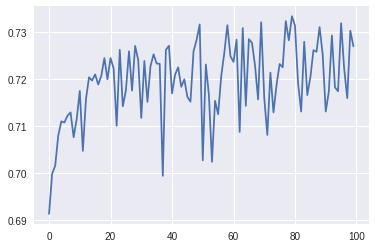

In [46]:
# Caso queiram plotar alguma coisa

import matplotlib.pyplot as plt
plt.plot(accuracies)

# Classificando classes individuais

#DATASETS


In [0]:
def data(target_labels,grayscale_dataset_train,grayscale_dataset_test):
  linear_dataset_train = []
  linear_dataset_test = []
  for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
  for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))
  return linear_dataset_train,linear_dataset_test


#TREINO

In [0]:
def training(linear_dataset_train,label_set):
  weights = (np.random.rand(1,size) - 0.5)[0]
  bias = (np.random.rand(1) - 0.5) 
  weights = np.append(weights, bias) 
  bestEvaluation = 0
  neta = 0.001

  # Implemente o treino aqui (para separar as duas classes definidas)
  accuracies = []
  for epoch in range(100): 
    np.random.shuffle(linear_dataset_train)
    for img,label in linear_dataset_train:
      inputs = np.append(img,[1])
      pred = perceptron(inputs,weights)
      error = label - sigmoid(pred) 
      loss = inputs*error*neta*(sigmoid_derivate(pred))
      weights += loss
    acc = evaluate(weights,linear_dataset_train) 
    if(acc>bestEvaluation):
      bestEvaluation = acc
      best_weights = weights
  print(label_set," ",bestEvaluation)  
  weights =[]
  weights= {
      "weights": best_weights,
      "label": label_set
  }
  print("DONE")
  return weights

#PREPARANDOS OS DATASETS


In [49]:
plane_dataset_train,plane_dataset_test = data(["plane"],grayscale_dataset_train,grayscale_dataset_test)
car_dataset_train,car_dataset_test = data(["car"],grayscale_dataset_train,grayscale_dataset_test)
bird_dataset_train,bird_dataset_test = data(["bird"],grayscale_dataset_train,grayscale_dataset_test)
cat_dataset_train,cat_dataset_test = data(["cat"],grayscale_dataset_train,grayscale_dataset_test)
deer_dataset_train,deer_dataset_test = data(["deer"],grayscale_dataset_train,grayscale_dataset_test)
dog_dataset_train,dog_dataset_test = data(["dog"],grayscale_dataset_train,grayscale_dataset_test)
frog_dataset_train,frog_dataset_test = data(["frog"],grayscale_dataset_train,grayscale_dataset_test)
horse_dataset_train,horse_dataset_test = data(["horse"],grayscale_dataset_train,grayscale_dataset_test)
ship_dataset_train,ship_dataset_test = data(["ship"],grayscale_dataset_train,grayscale_dataset_test)
truck_dataset_train,truck_dataset_test = data(["truck"],grayscale_dataset_train,grayscale_dataset_test)
print("DONE DATASETS")


DONE DATASETS


#TREINANDO PERCEPTRONS

In [50]:

plane_weights = training(plane_dataset_train,"plane")
car_weights = training(car_dataset_train,"car")
bird_weights = training(bird_dataset_train,"bird")
cat_weights = training(cat_dataset_train,"cat")
deer_weights = training(deer_dataset_train,"deer")
dog_weights = training(dog_dataset_train,"dog")
frog_weights = training(frog_dataset_train,"frog")
horse_weights = training(horse_dataset_train,"horse")
ship_weights = training(ship_dataset_train,"ship")
truck_weights = training(truck_dataset_train,"truck")
print("DONE TRAINING")


plane   0.90004
DONE
car   0.90672
DONE
bird   0.9
DONE
cat   0.9003
DONE
deer   0.89996
DONE
dog   0.90364
DONE
frog   0.90008
DONE
horse   0.90594
DONE
ship   0.9
DONE
truck   0.90698
DONE
DONE TRAINING


#AVALIANDO PERCEPTRONS

In [51]:
print("plane acc = ",evaluate(plane_weights["weights"],plane_dataset_test))
print("car acc = ",evaluate(car_weights['weights'],car_dataset_test))
print("bird acc = ",evaluate(bird_weights["weights"],bird_dataset_test))
print("cat acc = ",evaluate(cat_weights["weights"],cat_dataset_test))
print("deer acc = ",evaluate(deer_weights["weights"],deer_dataset_test))
print("dog acc = ",evaluate(dog_weights["weights"],dog_dataset_test))
print("frog acc = ",evaluate(frog_weights["weights"],frog_dataset_test))
print("horse acc = ",evaluate(horse_weights["weights"],horse_dataset_test))
print("ship acc = ",evaluate(ship_weights["weights"],ship_dataset_test))
print("truck acc = ",evaluate(truck_weights["weights"],truck_dataset_test))








plane acc =  0.8997
car acc =  0.9047
bird acc =  0.8996
cat acc =  0.8995
deer acc =  0.8999
dog acc =  0.903
frog acc =  0.8998
horse acc =  0.903
ship acc =  0.8972
truck acc =  0.9012


In [0]:
weights_all =[
    plane_weights,
    car_weights,
    bird_weights,
    cat_weights,
    deer_weights,
    dog_weights,
    frog_weights,
    horse_weights,
    ship_weights,
    truck_weights]


#TESTANDO OS PERCEPTRONS




---




In [0]:
def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result

In [56]:
print(sum(softmax([0.1,0.3,0.9])))

1.0


cat


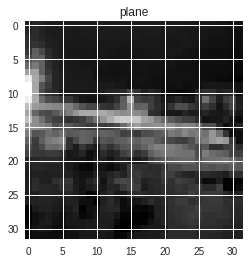

In [73]:
#testando com uma imagem qualquer

import matplotlib.pyplot as plt


classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index =1001
img = grayscale_dataset_test[index][0]
category =  grayscale_dataset_test[index][1]
linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
inputs = np.append(linear_img,[1])
preds = []
for weights in weights_all:
  pred = perceptron(inputs,weights["weights"])
  preds.append((pred,weights["label"]))

output= sorted(preds,reverse=True)

print(output[0][1])
plt.imshow(img, cmap='gray')
plt.title(category)
plt.show()



In [78]:
#Testando com o dataset de treino e de teste

wrong = 0
for img,category in grayscale_dataset_train:
  linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
  preds = []
  inputs = np.append(linear_img,[1])
  for weights in weights_all:
    pred = perceptron(inputs,weights["weights"])
    preds.append((pred,weights["label"]))
    
  output = sorted(preds)
  output = list(reversed(output))

  if category!=output[0][1]:
    wrong+=1

acc = (len(grayscale_dataset_train) -wrong)/len(grayscale_dataset_train) 
print("acuracia train = ",acc)


wrong = 0
for img,category in grayscale_dataset_test:
  linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
  preds = []
  inputs = np.append(linear_img,[1])
  for weights in weights_all:
    pred = perceptron(inputs,weights["weights"])
    preds.append((pred,weights["label"]))
  
  output = sorted(preds)
  output = list(reversed(output))

  if category!=output[0][1]:
    wrong+=1

acc = (len(grayscale_dataset_test) -wrong)/len(grayscale_dataset_test) 
print("acuracia test = ",acc)

acuracia train =  0.27126
acuracia test =  0.2588
